In [13]:
import matplotlib
#matplotlib.use('qtagg')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Notes_select = np.arange(383)
perflist = ['Demenga','Diaz','East','Enders','Gaillard1','Gaillard2','Geringas',
            'Haimovitz1','Haimovitz2','Helmerson','Kuijiken','LaMarca','Linden','Lipkind',
            'Mork','Narroway','Queyras','Rohmann','Tompkins','Viersen1','Viersen2',
            'Weilerstein','Wiseplwey']
perfcolors = ['k','blue','green','orange','red','yellowgreen','c','deeppink','lime','gold','springgreen',
              'violet','peru','silver','teal','magenta','orangered','mediumslateblue','hotpink','navy','gold',
             'cornflowerblue','darkgreen']

In [2]:
Beat_value = pd.read_csv("Beat Values Prelude 4 .csv")
Beatval = Beat_value["Beat Value"]

In [3]:
#Upload CSV files
Demenga = pd.read_csv("Demenga Tempo.csv")
Diaz = pd.read_csv("Diaz Tempo.csv")
East = pd.read_csv("East Tempo.csv")
Enders = pd.read_csv("Enders Tempo.csv")
Gaillard1 = pd.read_csv("Gaillard1 Tempo.csv")
Gaillard2 = pd.read_csv("Gaillard2 Tempo.csv")
Geringas = pd.read_csv("Geringas Tempo.csv")
Haimovitz1 = pd.read_csv("Haimovitz1 Tempo.csv")
Haimovitz2 = pd.read_csv("Haimovitz2 Tempo.csv")
Helmerson = pd.read_csv("Helmerson Tempo.csv")
Kuijiken = pd.read_csv("Kuijiken Tempo.csv")
LaMarca = pd.read_csv("LaMarca Tempo.csv")
Linden = pd.read_csv("Linden Tempo.csv")
Lipkind = pd.read_csv("Lipkind Tempo.csv")
Mork = pd.read_csv("Mork Tempo.csv")
Narroway = pd.read_csv("Narroway Tempo.csv")
Queyras = pd.read_csv("Queyras Tempo.csv")
Rohmann = pd.read_csv("Rohmann Tempo.csv")
Tompkins = pd.read_csv("Tompkins Tempo.csv")
Viersen1 = pd.read_csv("Viersen1 Tempo.csv")
Viersen2 = pd.read_csv("Viersen2 Tempo.csv")
Weilerstein = pd.read_csv("Weilerstein Tempo.csv")
Wispelwey = pd.read_csv("Wispelwey Tempo.csv")

titlelist = [Demenga, Diaz, East, Enders, Gaillard1, Gaillard2, Geringas,
            Haimovitz1, Haimovitz2, Helmerson, Kuijiken, LaMarca, Linden, Lipkind,
            Mork, Narroway, Queyras, Rohmann, Tompkins, Viersen1, Viersen2,
            Weilerstein, Wispelwey]

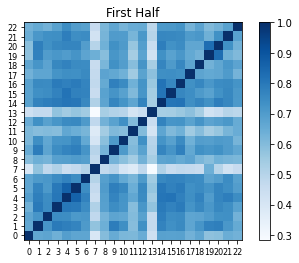

In [4]:
#Color map: First half
def makearray(i, titlelist):
    df = titlelist[i]
    df["Beatval"] = Beatval
    df['RealTempo'] = df['Tempo'] * df['Beatval']
    #print(df.head())
    df_new = df.iloc[:384, [4]]
    data = df_new.to_numpy()
    return data

alldata = np.full((384,0),np.nan)
for p in range(23):
    data = makearray(p,titlelist)
    alldata = np.concatenate((alldata,data),axis=1)

out = np.corrcoef(alldata.T)
plt.figure()
#plt.imshow(out,cmap='bwr',vmin=-1,vmax=1)
plt.imshow(out,cmap='Blues')
plt.xticks(np.arange(23),fontsize=8)
plt.yticks(np.arange(23),fontsize=8)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('First Half')
plt.pause(0.01)
plt.ion()
plt.ioff()
plt.ion()

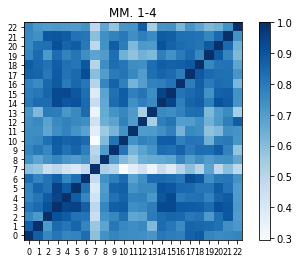

In [5]:
#Color map: first 4 measures
def makearraymeasure(i, titlelist):
    df = titlelist[i]
    df["Beatval"] = Beatval
    df['RealTempo'] = df['Tempo'] * df['Beatval']
    #print(df.head())
    df_new = df.iloc[0:32, [4]]
    data = df_new.to_numpy()
    return data

alldata = np.full((32,0),np.nan)
for p in range(23):
    data = makearraymeasure(p,titlelist)
    alldata = np.concatenate((alldata,data),axis=1)

out = np.corrcoef(alldata.T)
plt.figure()
#plt.imshow(out,cmap='bwr',vmin=-1,vmax=1)
plt.imshow(out,cmap='Blues')
plt.xticks(np.arange(23),fontsize=8)
plt.yticks(np.arange(23),fontsize=8)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('MM. 1-4')
plt.show()
plt.pause(0.01)
plt.ion()
plt.ioff()
plt.ion()

In [6]:
#Calc mean of relative values
alldata = np.full((384,0),np.nan)
for p in range(23):
    data = makearray(p,titlelist)
    alldata = np.concatenate((alldata,data),axis=1)

out = np.corrcoef(alldata.T)
outdf = pd.DataFrame(out)
print(outdf)
mean = outdf.mean(axis=0)
print(mean.sort_values())

          0         1         2         3         4         5         6   \
0   1.000000  0.663734  0.670976  0.635245  0.690110  0.670059  0.669293   
1   0.663734  1.000000  0.720347  0.795463  0.779234  0.767534  0.706098   
2   0.670976  0.720347  1.000000  0.747575  0.744969  0.709194  0.713956   
3   0.635245  0.795463  0.747575  1.000000  0.803048  0.796957  0.746514   
4   0.690110  0.779234  0.744969  0.803048  1.000000  0.862503  0.771973   
5   0.670059  0.767534  0.709194  0.796957  0.862503  1.000000  0.742891   
6   0.669293  0.706098  0.713956  0.746514  0.771973  0.742891  1.000000   
7   0.394225  0.574503  0.475359  0.513073  0.445127  0.467455  0.504208   
8   0.595341  0.637131  0.623739  0.685103  0.689429  0.698120  0.688093   
9   0.649516  0.785755  0.671257  0.745120  0.765502  0.781464  0.720675   
10  0.612599  0.737786  0.664192  0.720019  0.725707  0.758504  0.656208   
11  0.611270  0.592563  0.597431  0.594134  0.664030  0.639805  0.617864   
12  0.646547

<IPython.core.display.Javascript object>


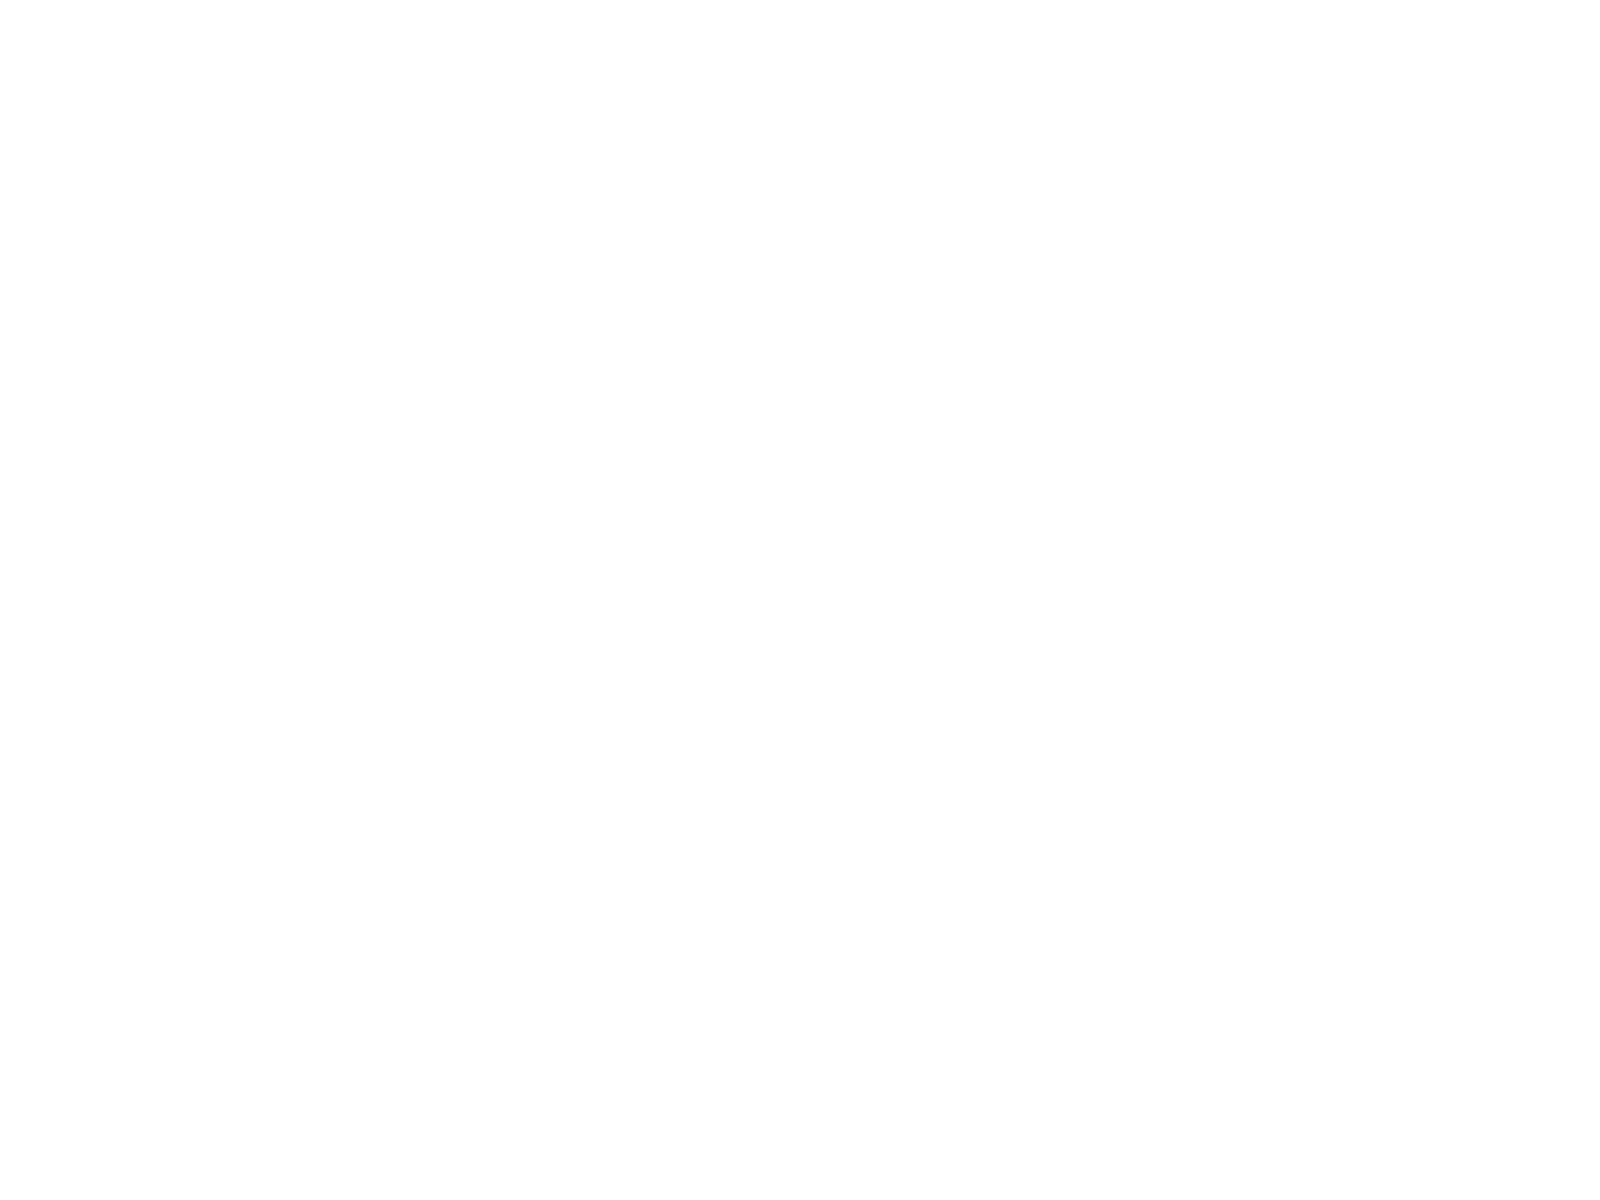

22
(656, 2)


<IPython.core.display.Javascript object>


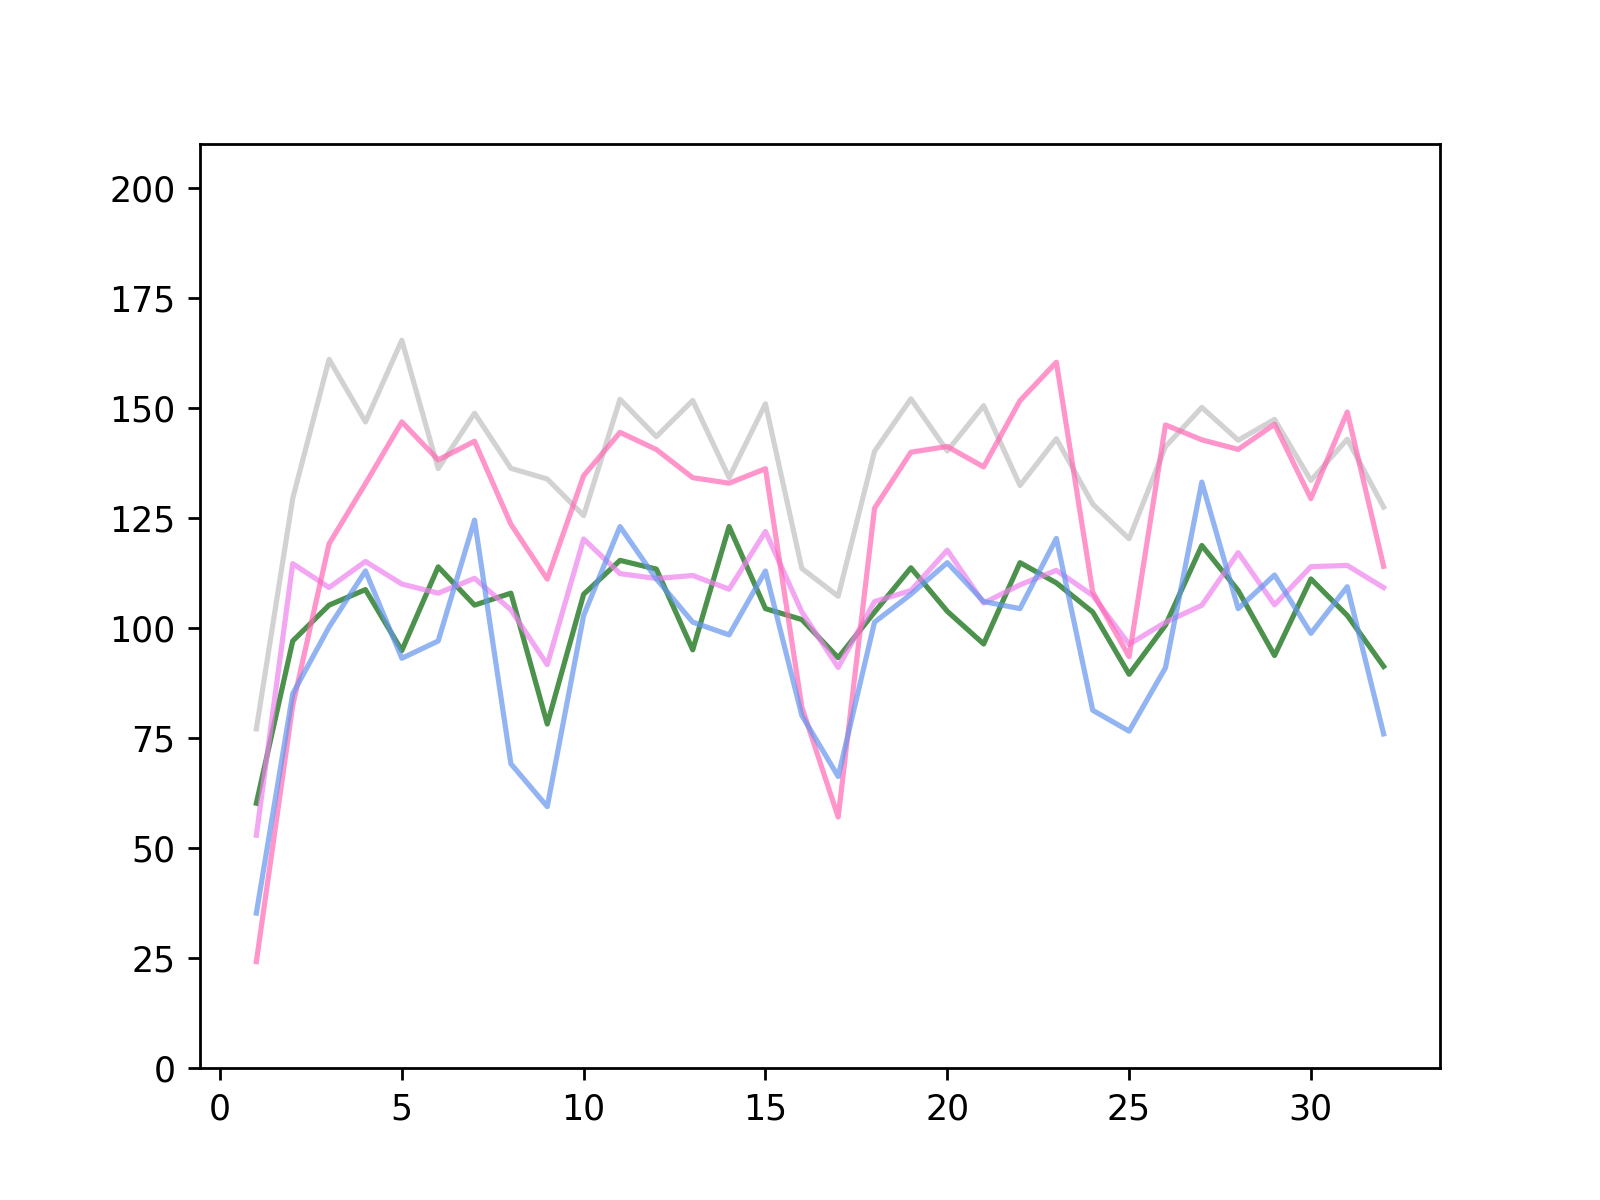

13
(656, 2)
11
(656, 2)
18
(656, 2)
21
(656, 2)


In [19]:
#Line graph of local phrase structures: similar
fig, ax = plt.subplots()
%matplotlib notebook
for i in [22,13,11,18,21]:  #titlelist[1]:
    print(i)
    df = titlelist[i]
    df["Beatval"] = Beatval
    df['RealTempo'] = df['Tempo'] * df['Beatval']
    #print(df.head())
    df_new = df.iloc[:, [2,4]]
    DF = df_new.to_numpy()
    print( DF.shape )
    plt.plot(DF[0:32,0],DF[0:32,1],color=perfcolors[i],alpha=0.7,linewidth=1.5,label= titlelist[i])
    plt.title('')
    plt.ylim(0,210)
    plt.show()
    plt.pause(.001)


<IPython.core.display.Javascript object>


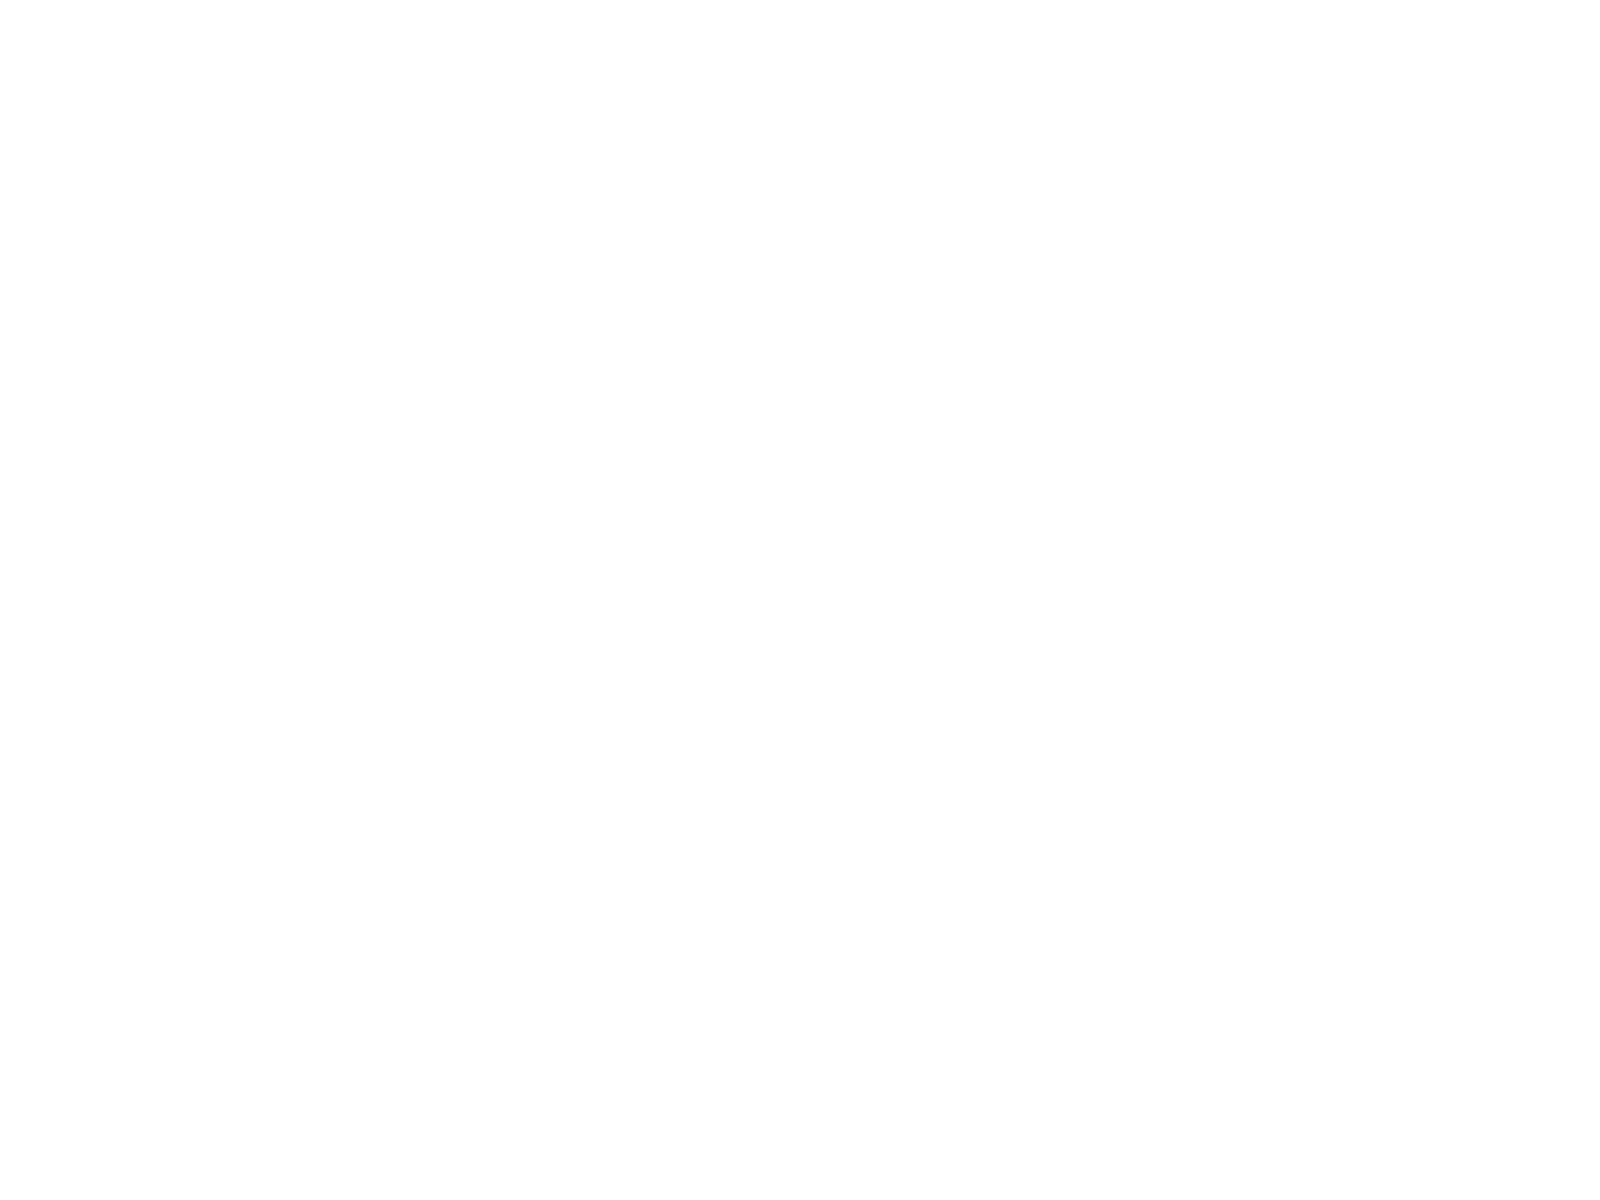

7
(656, 2)


<IPython.core.display.Javascript object>


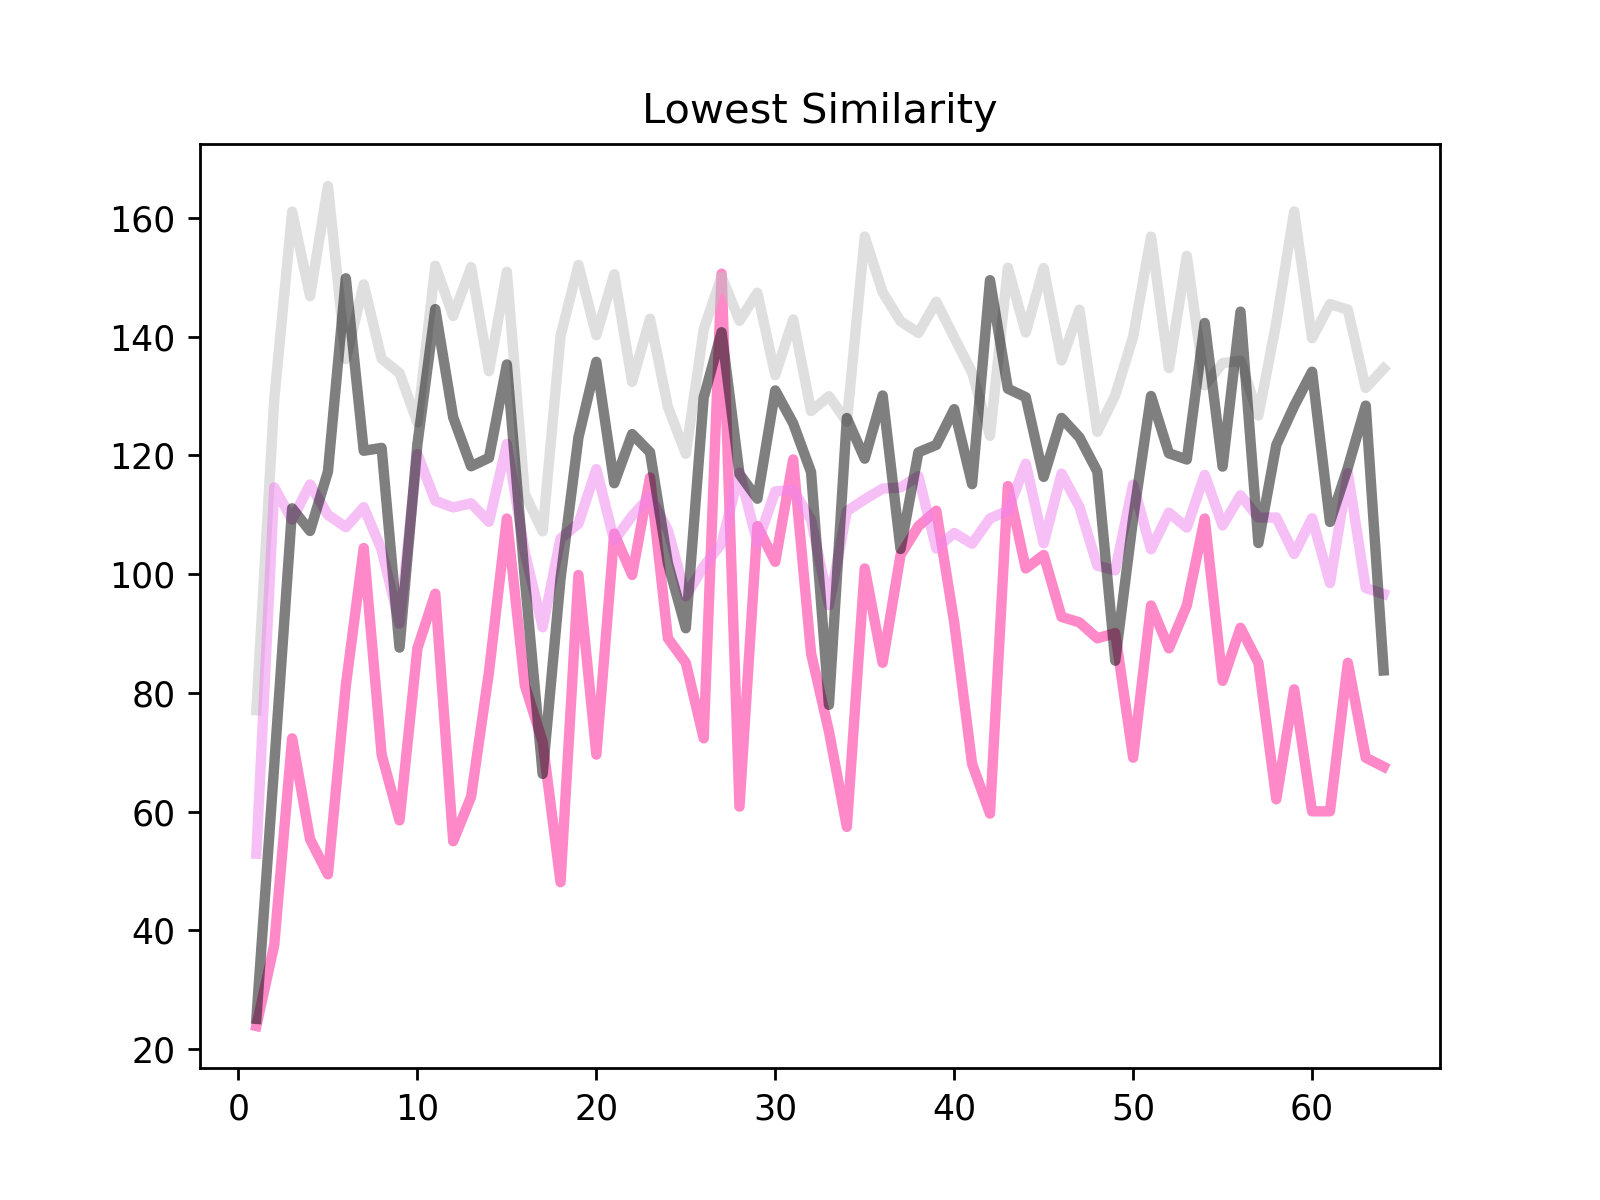

13
(656, 2)
11
(656, 2)
0
(656, 2)


In [18]:
#Line graph of local phrase structures: different
fig, ax = plt.subplots()
%matplotlib notebook
for i in [7,13,11,0]:  #titlelist[1]:
    print(i)
    df = titlelist[i]
    df["Beatval"] = Beatval
    df['RealTempo'] = df['Tempo'] * df['Beatval']
    #print(df.head())
    df_new = df.iloc[:, [2,4]]
    DF = df_new.to_numpy()
    print( DF.shape )
    plt.plot(DF[0:64,0],DF[0:64,1],color=perfcolors[i],alpha=0.5,linewidth=3,label= titlelist[i])
    plt.title('Lowest Similarity')
    plt.show()
    plt.pause(.001)


<IPython.core.display.Javascript object>


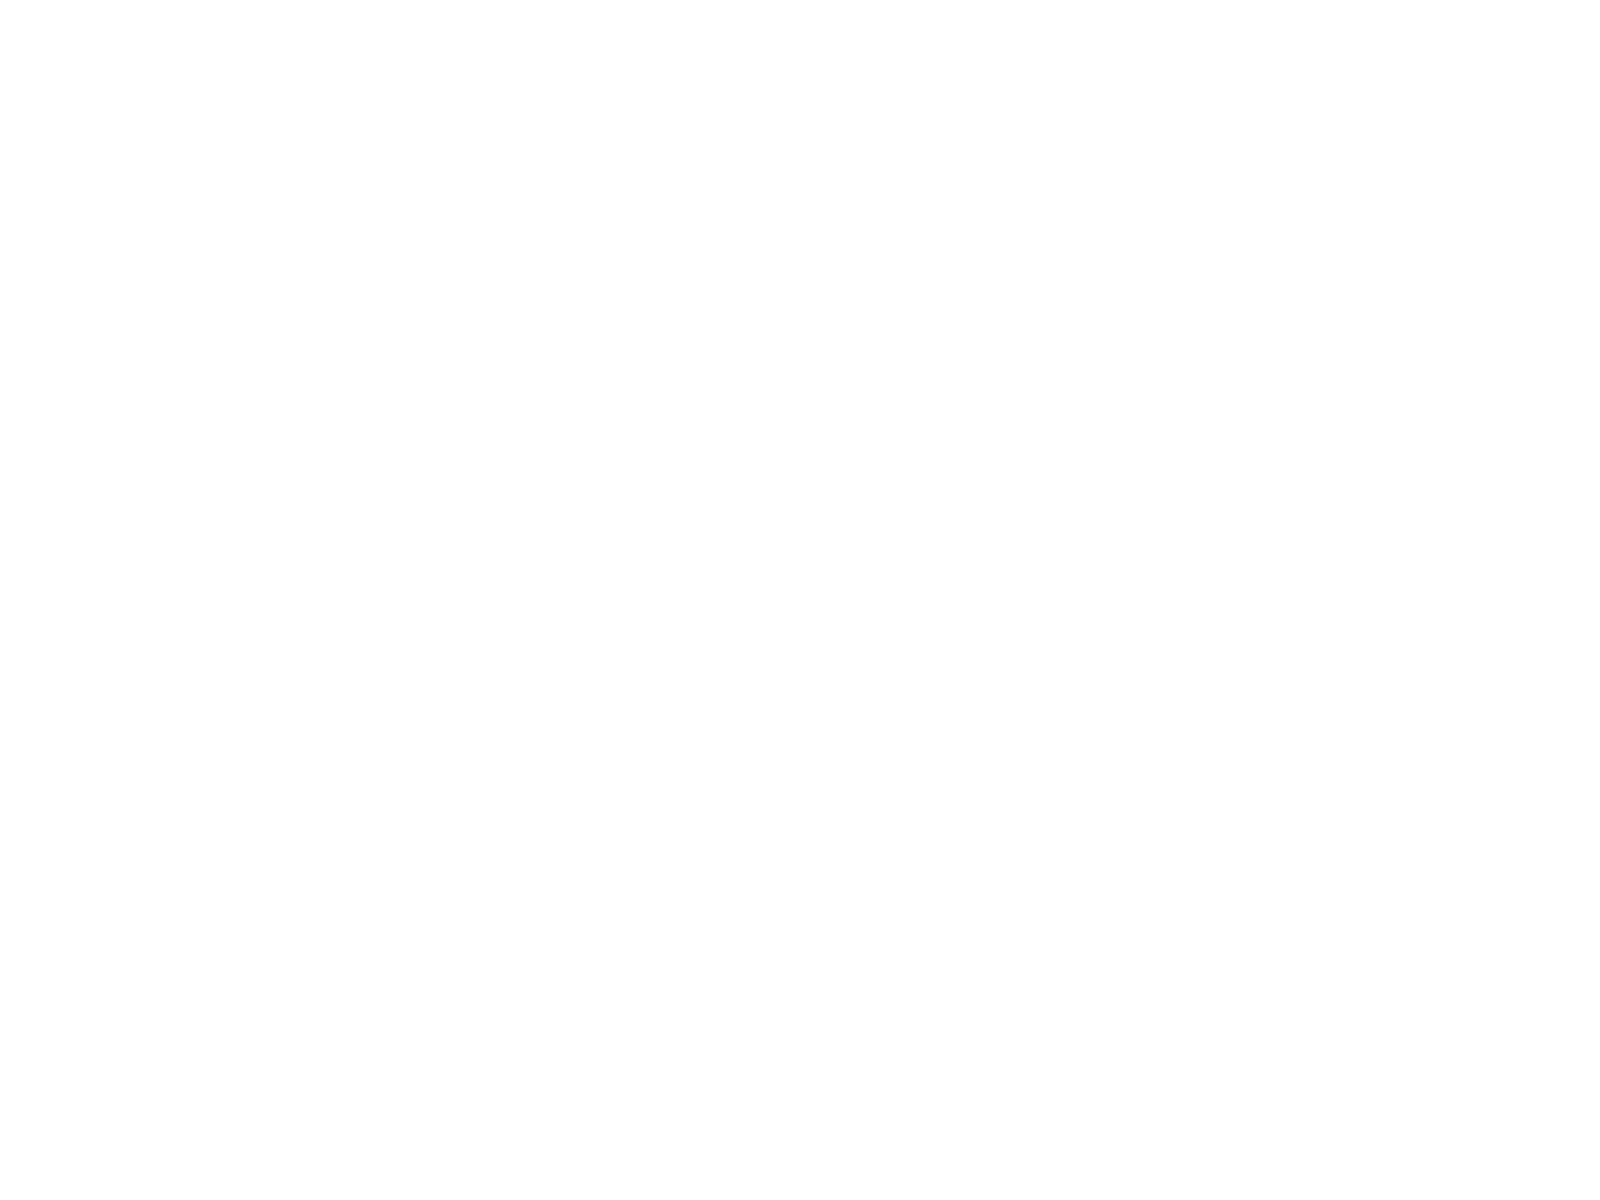

5
(656, 2)


<IPython.core.display.Javascript object>


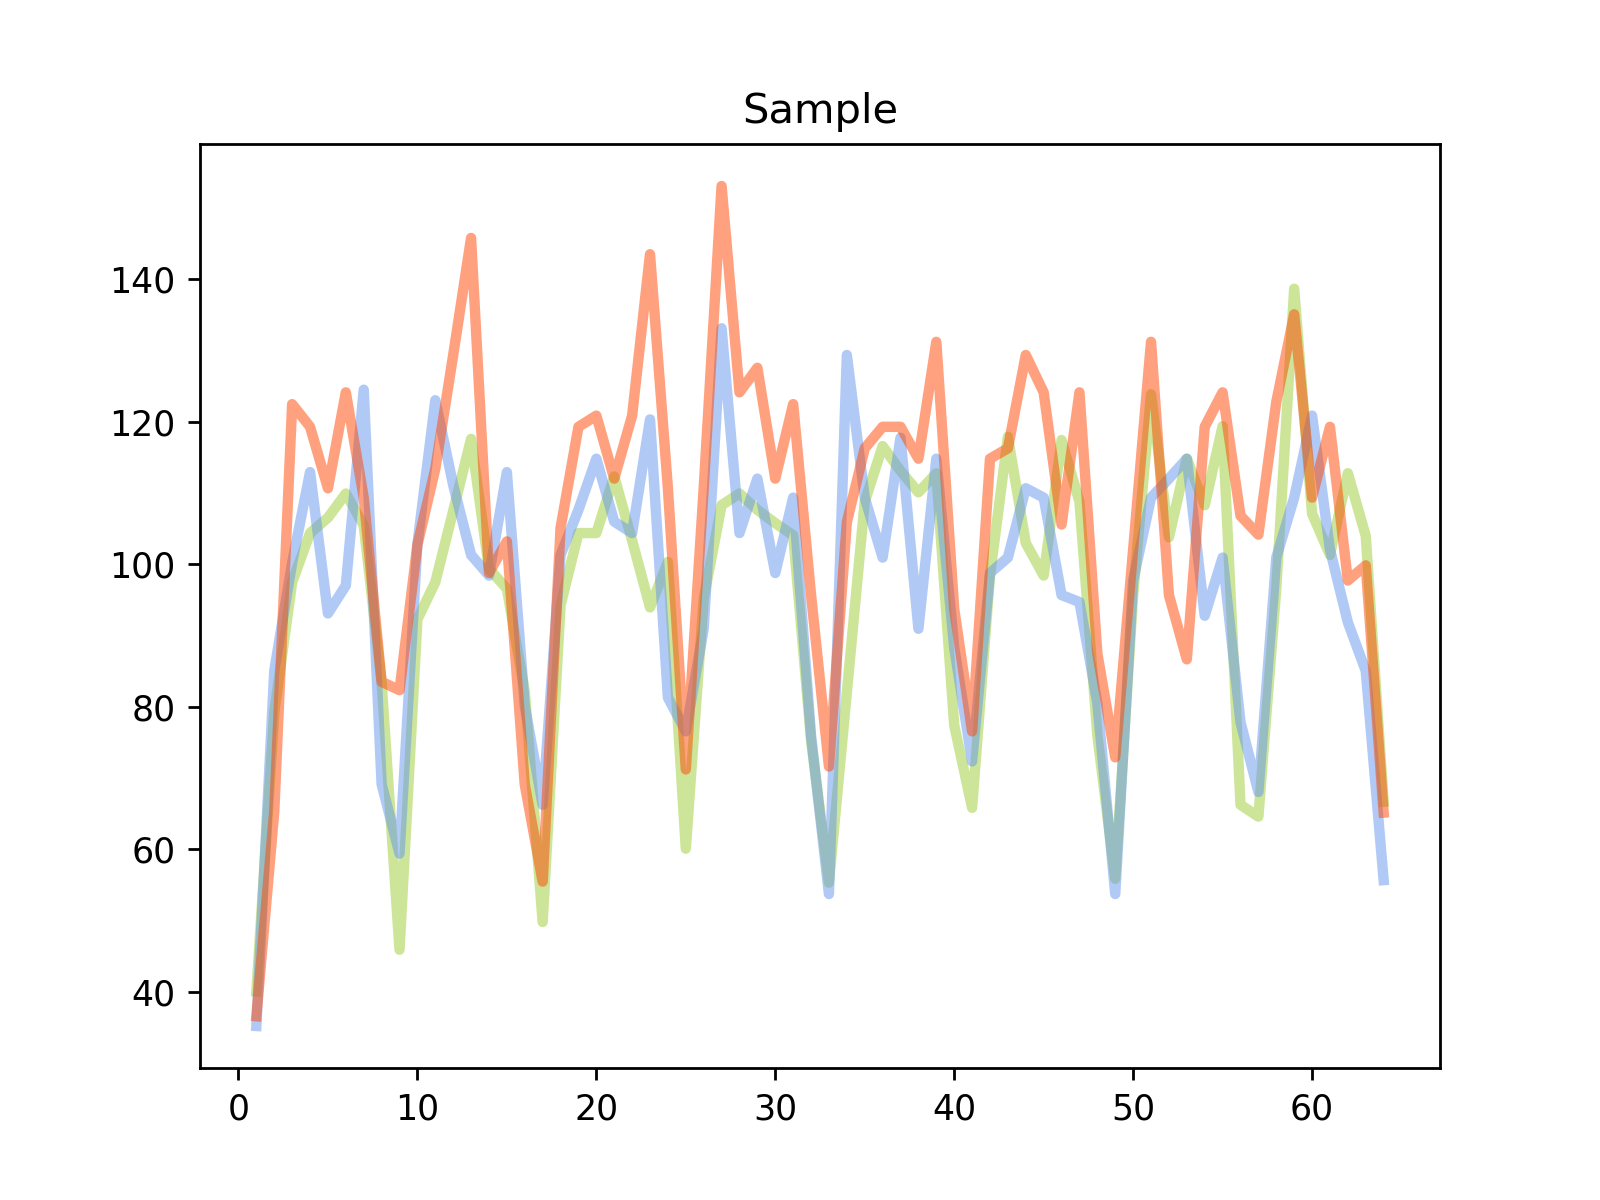

21
(656, 2)
16
(656, 2)


In [17]:
fig, ax = plt.subplots()
%matplotlib notebook
for i in [5,21,16]:  #titlelist[1]:
    print(i)
    df = titlelist[i]
    df["Beatval"] = Beatval
    df['RealTempo'] = df['Tempo'] * df['Beatval']
    #print(df.head())
    df_new = df.iloc[:, [2,4]]
    DF = df_new.to_numpy()
    print( DF.shape )
    plt.plot(DF[0:64,0],DF[0:64,1],color=perfcolors[i],alpha=0.5,linewidth=3,label= titlelist[i])
    plt.title('Sample')
    plt.show()
    plt.pause(.001)

<IPython.core.display.Javascript object>


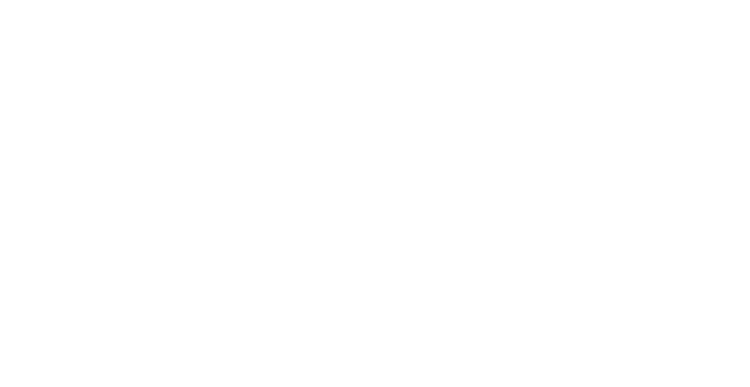

5
(656, 2)


<IPython.core.display.Javascript object>


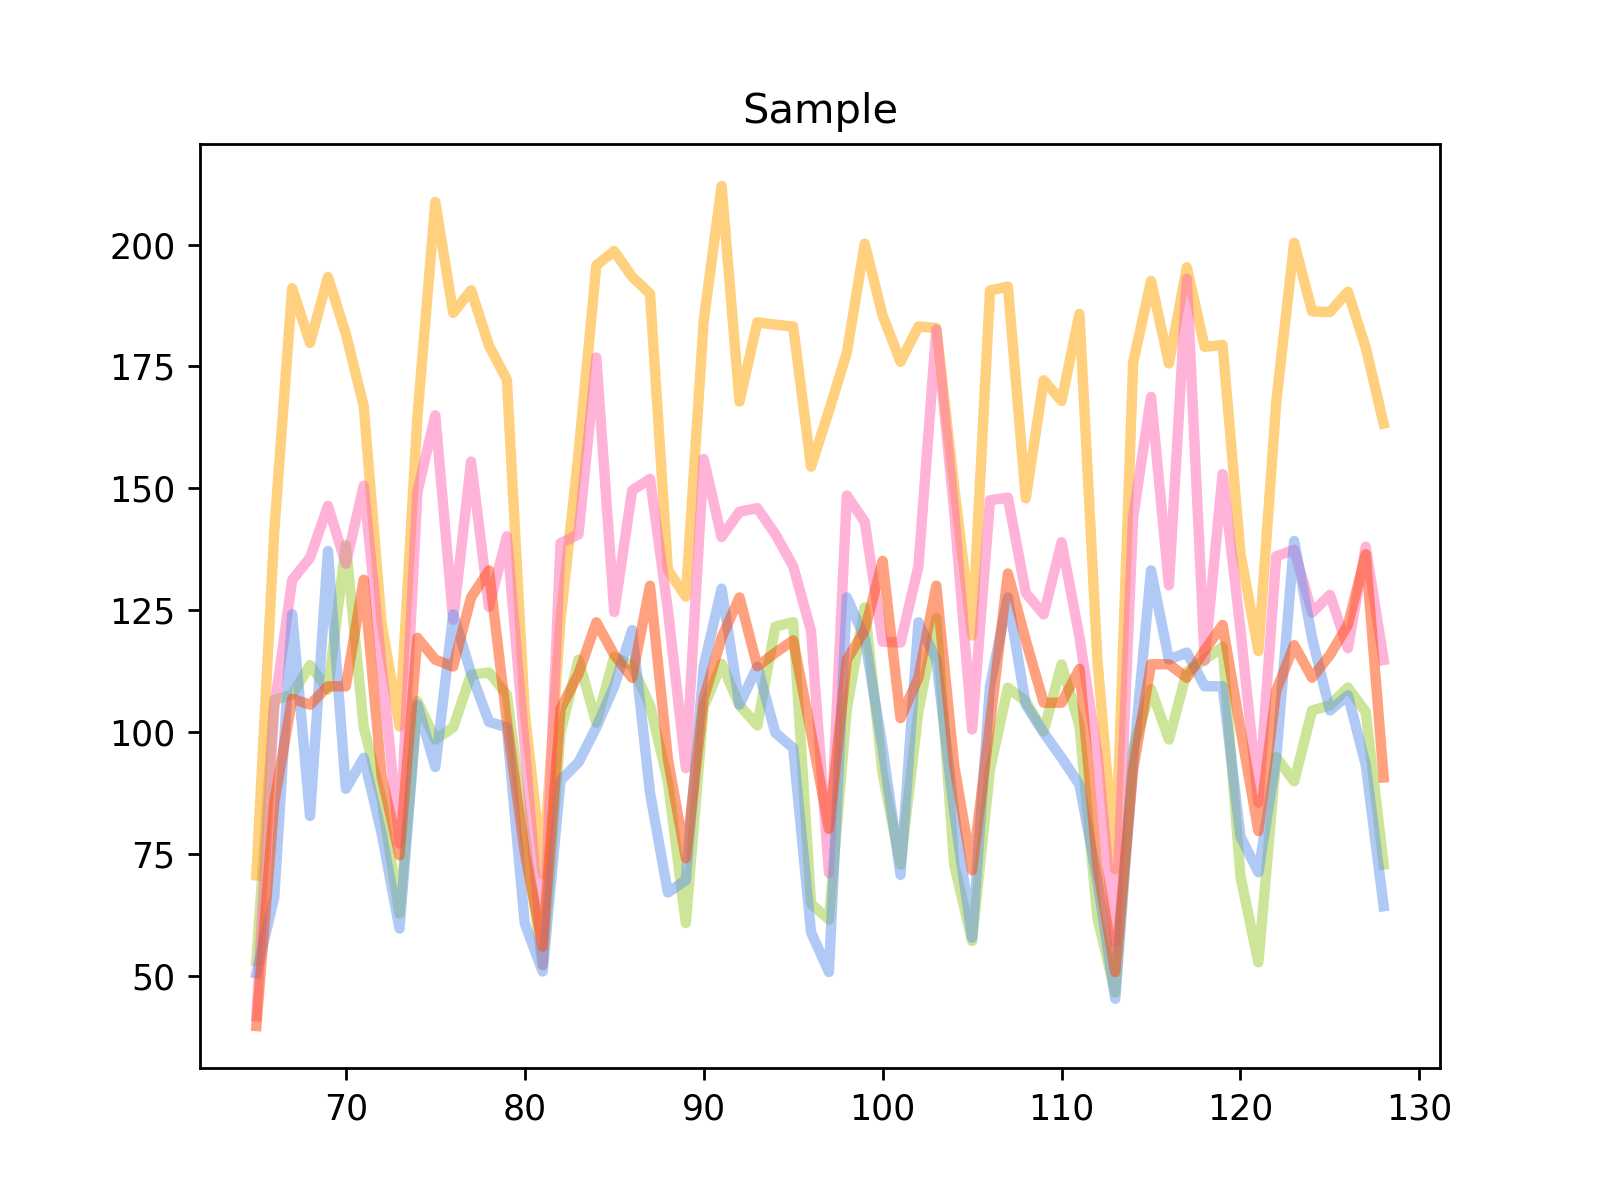

3
(656, 2)
18
(656, 2)
21
(656, 2)
16
(656, 2)


In [16]:
fig, ax = plt.subplots()
%matplotlib notebook
for i in [5,3,18,21,16]:  #titlelist[1]:
    print(i)
    df = titlelist[i]
    df["Beatval"] = Beatval
    df['RealTempo'] = df['Tempo'] * df['Beatval']
    #print(df.head())
    df_new = df.iloc[:, [2,4]]
    DF = df_new.to_numpy()
    print( DF.shape )
    plt.plot(DF[64:128,0],DF[64:128,1],color=perfcolors[i],alpha=0.5,linewidth=3,label= titlelist[i])
    plt.title('Sample')
    plt.show()
    plt.pause(.001)

<IPython.core.display.Javascript object>


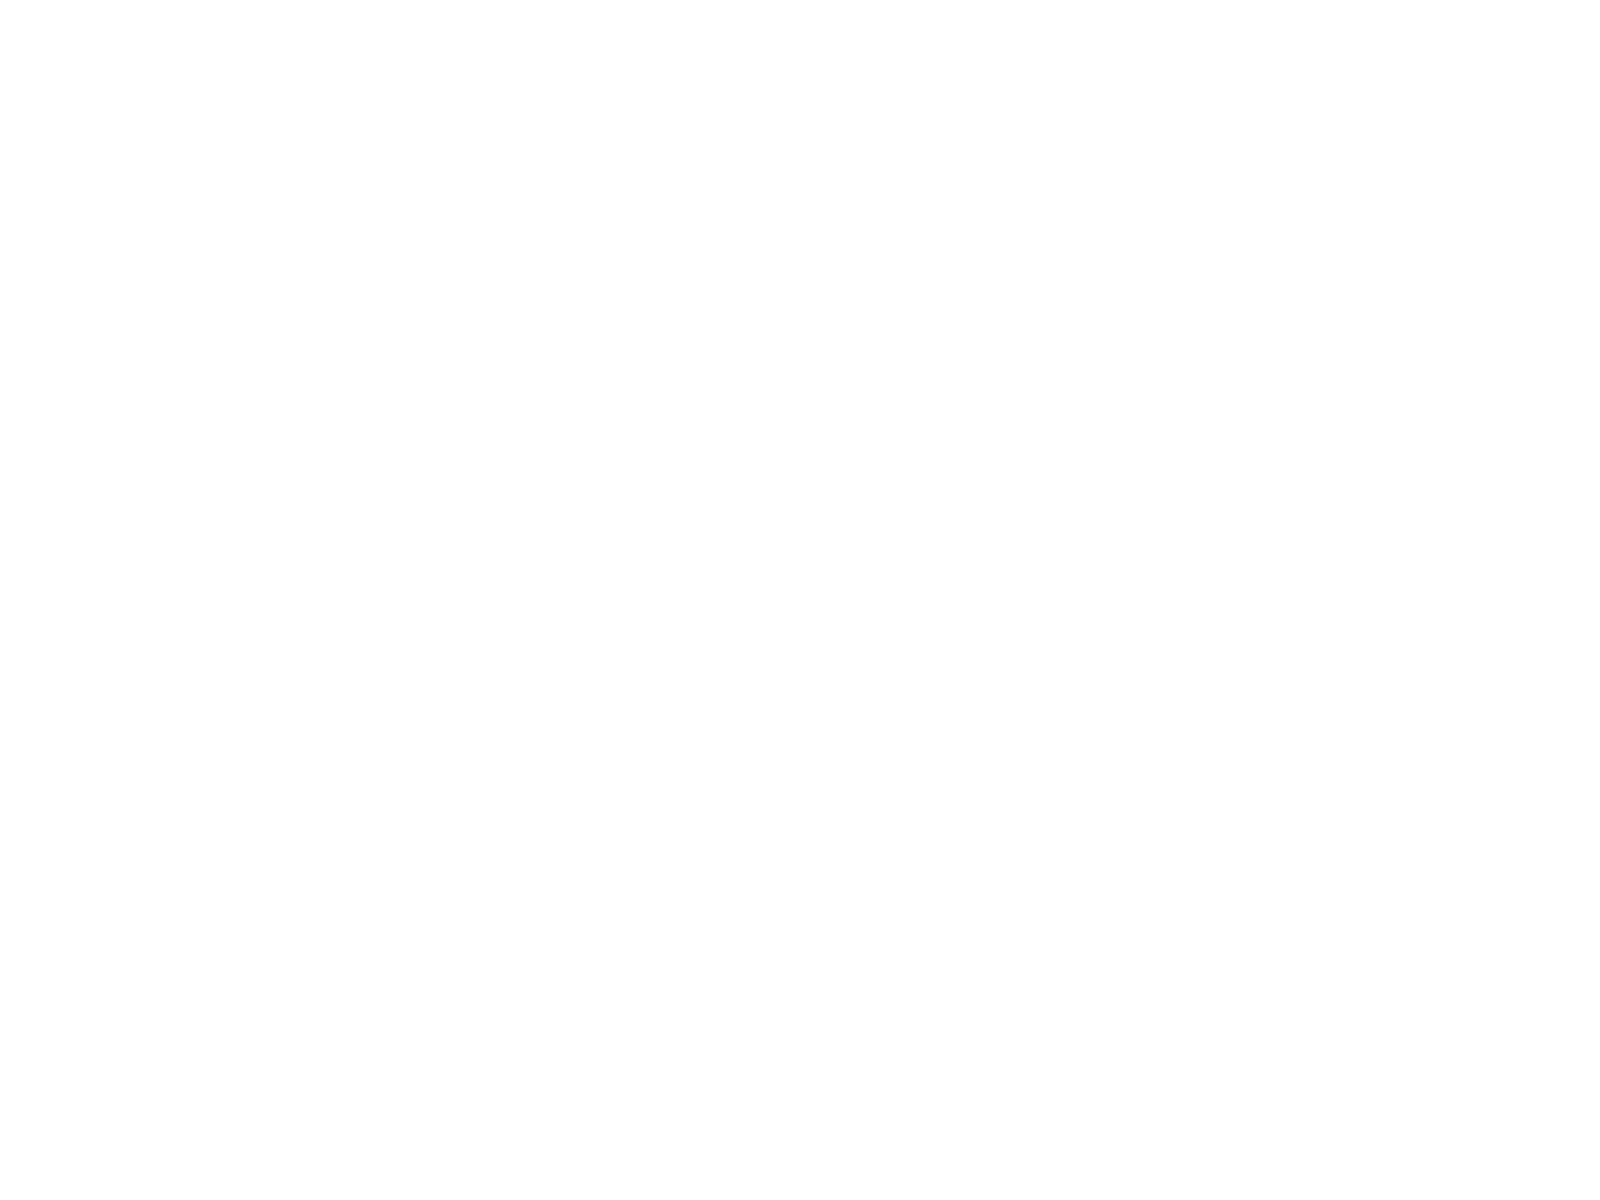

3
(656, 2)


<IPython.core.display.Javascript object>


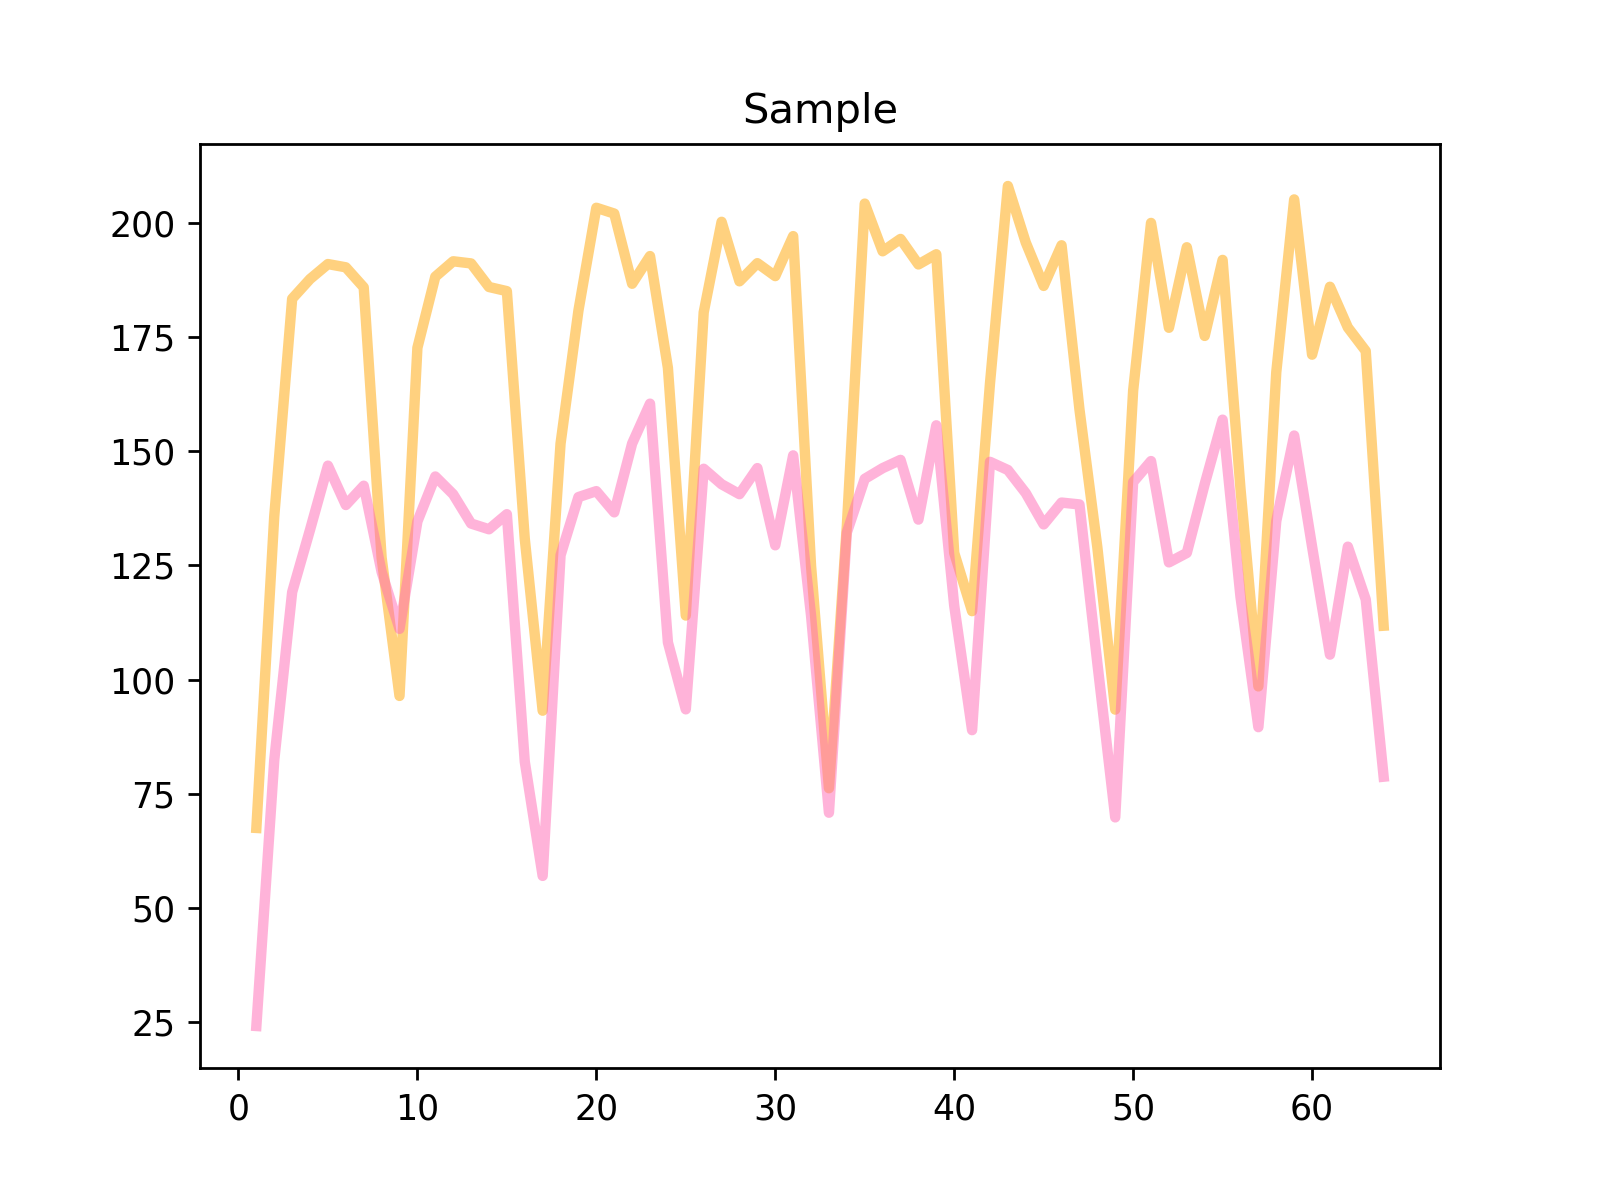

18
(656, 2)


In [14]:
fig, ax = plt.subplots()
%matplotlib notebook
for i in [3,18]:  #titlelist[1]:
    print(i)
    df = titlelist[i]
    df["Beatval"] = Beatval
    df['RealTempo'] = df['Tempo'] * df['Beatval']
    #print(df.head())
    df_new = df.iloc[:, [2,4]]
    DF = df_new.to_numpy()
    print( DF.shape )
    plt.plot(DF[0:64,0],DF[0:64,1],color=perfcolors[i],alpha=0.5,linewidth=3,label= titlelist[i])
    plt.title('Sample')
    plt.show()
    plt.pause(.001)

<IPython.core.display.Javascript object>


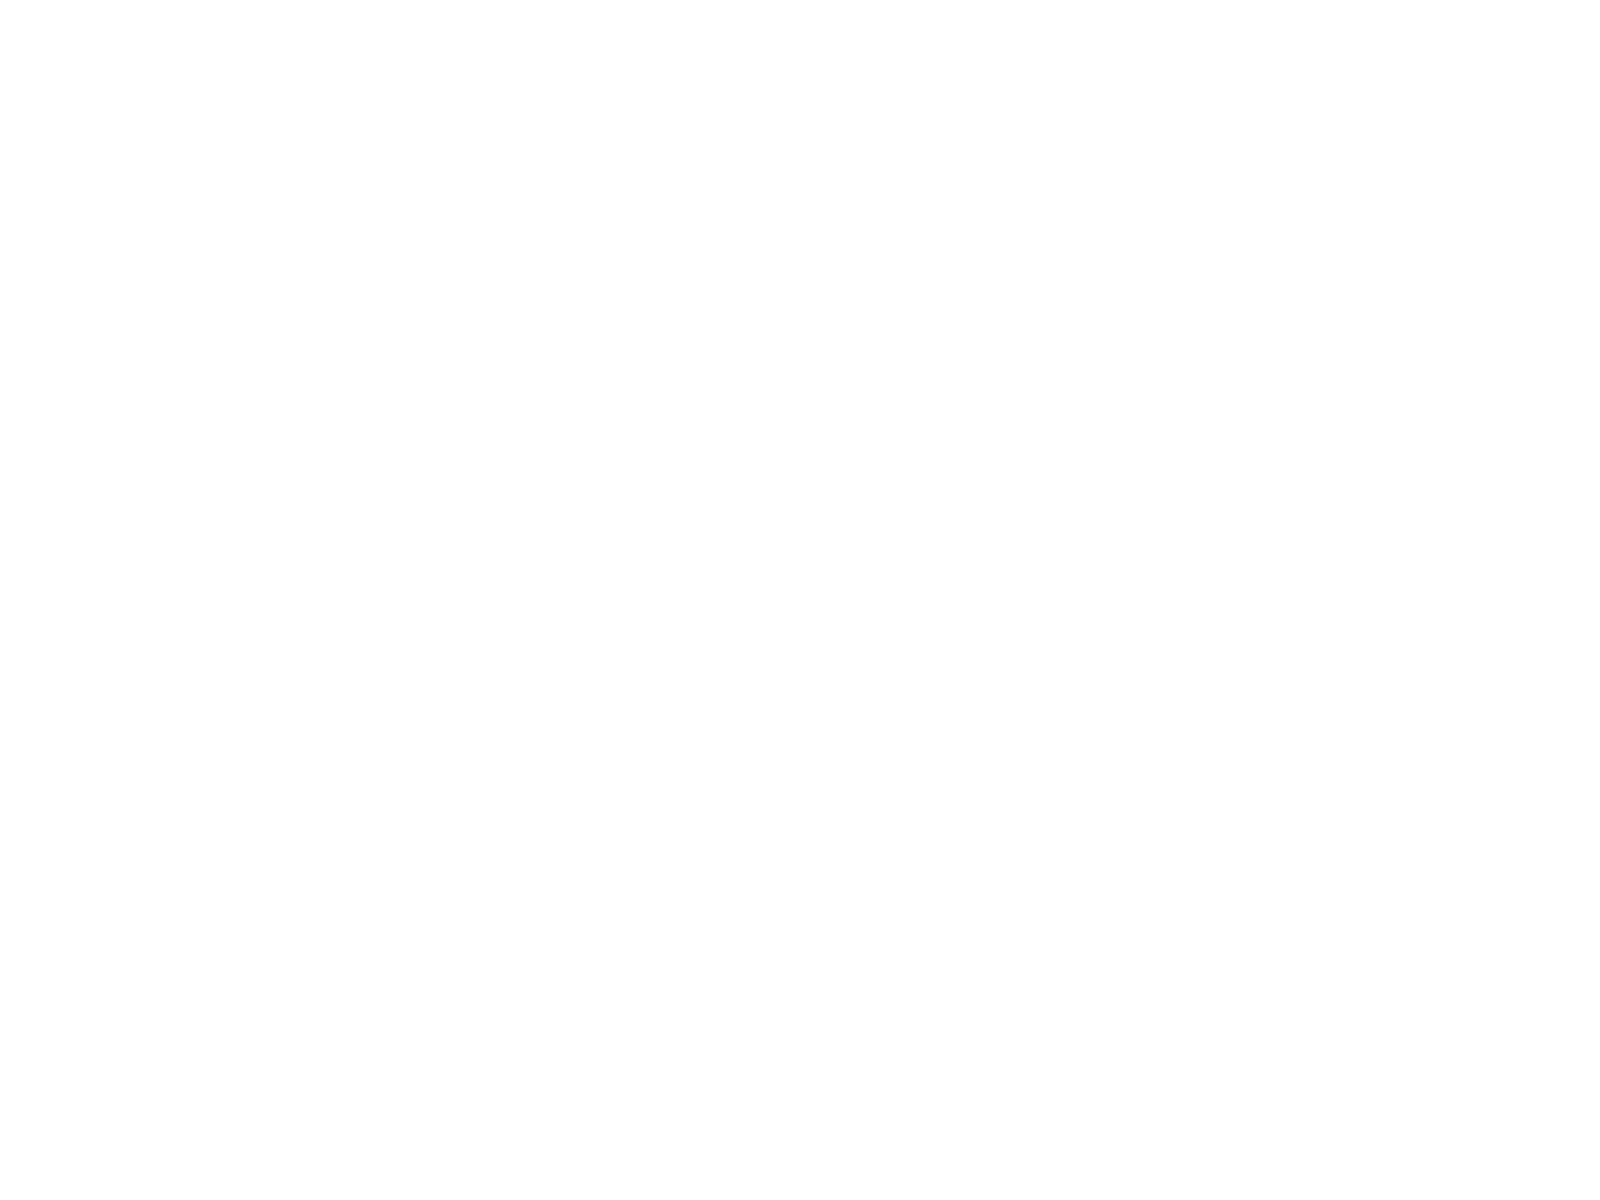

14
(656, 2)


<IPython.core.display.Javascript object>


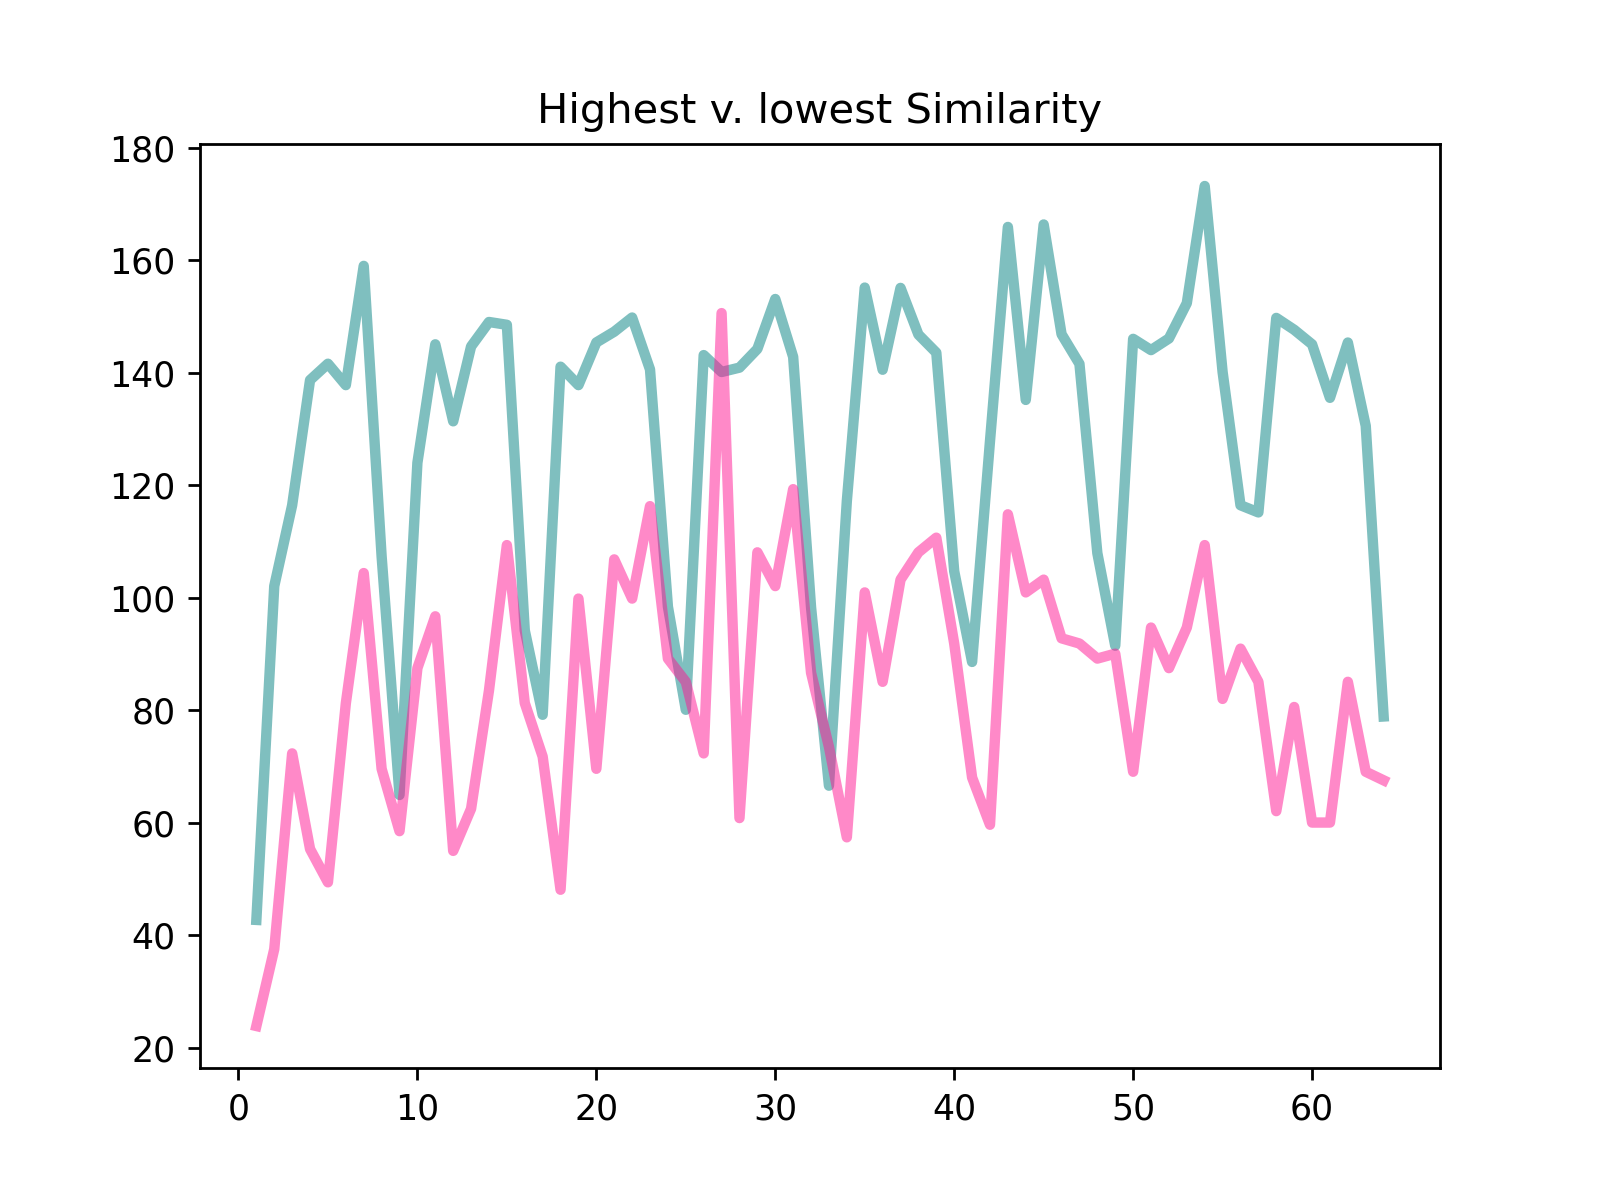

7
(656, 2)


In [12]:
fig, ax = plt.subplots()
%matplotlib notebook
for i in [14,7]:  #titlelist[1]:
    print(i)
    df = titlelist[i]
    df["Beatval"] = Beatval
    df['RealTempo'] = df['Tempo'] * df['Beatval']
    #print(df.head())
    df_new = df.iloc[:, [2,4]]
    DF = df_new.to_numpy()
    print( DF.shape )
    plt.plot(DF[0:64,0],DF[0:64,1],color=perfcolors[i],alpha=0.5,linewidth=3,label= titlelist[i])
    plt.title('Highest v. lowest Similarity')
    plt.show()
    plt.pause(.001)
